## Transformada inversa de Laplace

En control de procesos podemos describir la dinámica de un procesos utilizando la función de transferencia, $G(s)$. La respuesta del proceso, $y(s)$, es:

$$y(s) = G(s) f(s)$$

donde $f(s)$ es la función entrada. Las funciones de entrada típicas pueden ser el escalón, el impulso o el seno, por decir tres habituales.

Para obtener la respuesta dinámica con el tiempo es necesario realizar la transformda inversa de Laplace:

$$y(t) = L^{-1}[y(s)]$$

A continuación vamos a ver como se calcula de manera sencilla utilizando __sympy__, cuando podemos obtener una solución algebráica, y como calcular $y(t)$ numéricamente utilizando __mpmath__

### Usando sympy

Ideal cuando tenemos sistemas relativamente simples. Veamos un ejemplo consistente en un proceso de segundo orden y una entrada en forma de escalón unidad:

$$ G(s) = \frac{1}{(s+1) (s+3)} \\ y(s) = \frac{1}{s}$$

Empezamos cargando sympy:

In [1]:
from sympy import *
init_printing() # Para obtener resultado bonitos

A continuación cargamos los símbolos que vamos a necesitar:

In [2]:
t = symbols("t", real=True)
s = symbols("s")

y definimos $G(s)$ y $f(s)$:

In [9]:
G = 1/((s+1)*(s+3))
f = 1/s
y = G*f

In [10]:
inverse_laplace_transform(y, s, t)

Ya hemos obtenido la respuesta. Sympy representa el escalón unidad o función de Heaviside como $\theta(t)$.

Veamos que ocurre si planteamos una función de transferencia más compleja:

In [11]:
G2 = 1/(s**4+s**3+s**2+s+1)
y2 = G2*f

In [6]:
# inverse_laplace_transform(y2, s, t)

En mi ordenador, sympy se ha quedado pensando y he tenido que acabar interrumpiendo el cálculo. En estas situaciones en las que no podemos obtener una solución analitica, tenemos que recurrir al cálculo numérico. Afortunadamente es casi tan sencillo como utilizar sympy.

### Resolución numérica

Empezaremos cargando las dos instrucciones que vamos a necesitar, _invertlaplace_ de mpmath y _linspace_ de numpy:

In [7]:
from mpmath import invertlaplace
from numpy import linspace

A continuación vamos a transformar la expresión de sympy en una versión apta para poder trabajar con ella numéricamente usando _lambdify_:

In [14]:
ylam = lambdify(s, y2)

Vamos a simular la respuesta de este sistema para tiempos de 0.01 a 10. Calcularemos 100 puntos. Para eso crearemos un vector utilizando _linspace_:

In [13]:
tmin = 0.01
tmax = 10
n = 100
tnum = linspace(tmin, tmax, n)

La función _invertlaplace_ calcula numéricamente la transformada inversa de Laplace en un punto, como queremos calcularla para todos los puntos del vector _tnum_, usaremos un bucle:

In [15]:
ynum = [invertlaplace(ylam, i, method="dehoog") for i in tnum]

Hay diferentes métodos numéricos para calcular la inversa de la transformada de Laplace, después de varias pruebas, en general, en método que mejor resultado me ha dado de "dehoog". En la documentación se pueden encontrar fácilmente los otros métodos disponibles.

Vamos a representar la respuesta que hemos obtenido:

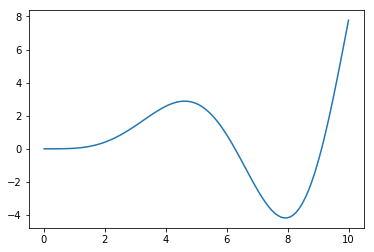

In [18]:
from matplotlib import pyplot as plt

plt.plot(tnum, ynum)